In [1]:
import pandas as pd
import numpy as np
import pickle

df = pd.read_csv('AssetData_Historical.csv')#.drop(['Machine_ID', 'Latitude', 'Longitude'], 1) #LongLat not unique with District
df_test = pd.read_csv('AssetData_New.csv').drop(['Machine_ID', 'Latitude', 'Longitude'], 1) #LongLat not unique with District

In [2]:
df.head()

,Machine_ID,Density_Overload,Abnormal_Flow_Rate,Heat_Flow,Asset_Integrity,Temperature_Differential,Volumetric_Flow_Rate,Tangential_Stress,Duct_Lengths_in_Units,Fault_in_last_Month,...,Compression_Ratio,Multiple_Connects,Water_Exposure_units,Humidity_Factor,Cathodic_Protection,Pressure_Class,District,Latitude,Longitude,Failure_NextHour
0,111436,7877,2,7879,783360,1062,1576,1716,1978,0,...,3,785,3139,128,1,1,Rochor,"1,31","103,87",0
1,185081,7877,2,7879,783360,1062,1576,1716,1978,0,...,3,785,3139,128,1,1,Geylang West,"1,32","103,89",0
2,111413,7099,1,7100,783360,844,1682,1698,1715,0,...,3,722,2874,128,1,1,Hume Estate,"1,35","103,82",0
3,185070,7099,1,7100,783360,844,1682,1698,1715,0,...,3,722,2874,128,1,1,Little India,"1,31","103,85",0
4,111385,7797,3,7800,783360,1029,1604,1641,1880,0,...,3,836,4831,128,1,1,Jurong?esidential,"1,35","103,82",1


In [3]:
def cleanLongLat(l):
    split = l.str.split(',', expand=True)
    split = (split[0]+'.'+[i if len(i)>1 else i+'0' for i in split[1]]).astype(float)
    return(split)

df['Latitude'] = cleanLongLat(df['Latitude'])
df['Longitude'] = cleanLongLat(df['Longitude'])

In [4]:
df.boxplot(column='Latitude')

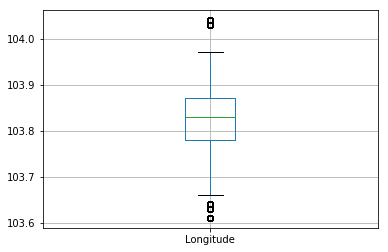

In [5]:
df.boxplot(column='Longitude')

In [6]:
df.isnull().sum()

Machine_ID                         0
Density_Overload                   0
Abnormal_Flow_Rate                 0
Heat_Flow                          0
Asset_Integrity                    0
Temperature_Differential           0
Volumetric_Flow_Rate               0
Tangential_Stress                  0
Duct_Lengths_in_Units              0
Fault_in_last_Month                0
Avg_hours_in_Use                   0
Pressure_Alarm                     0
Inclination_Angle                  0
Location_Fault_Code                0
Operating_Pressure_above_Normal    0
Vandalism_Reports                  0
Compression_Ratio                  0
Multiple_Connects                  0
Water_Exposure_units               0
Humidity_Factor                    0
Cathodic_Protection                0
Pressure_Class                     0
District                           0
Latitude                           0
Longitude                          0
Failure_NextHour                   0
dtype: int64

In [7]:
df.corr()

,Machine_ID,Density_Overload,Abnormal_Flow_Rate,Heat_Flow,Asset_Integrity,Temperature_Differential,Volumetric_Flow_Rate,Tangential_Stress,Duct_Lengths_in_Units,Fault_in_last_Month,...,Vandalism_Reports,Compression_Ratio,Multiple_Connects,Water_Exposure_units,Humidity_Factor,Cathodic_Protection,Pressure_Class,Latitude,Longitude,Failure_NextHour
Machine_ID,1.000000,0.096878,0.016056,0.068645,-0.036125,0.058190,0.125887,0.127674,0.166875,-0.014250,...,0.025852,0.052349,0.096683,0.097001,-0.013781,-0.053934,0.124425,-0.006023,0.001576,0.411650
Density_Overload,0.096878,1.000000,0.213953,0.816754,0.351662,0.377343,0.570871,0.556368,0.430534,-0.220760,...,0.193853,0.679247,0.820239,0.908305,0.506550,-0.351434,0.408092,-0.010312,-0.004230,-0.087024
Abnormal_Flow_Rate,0.016056,0.213953,1.000000,0.172850,-0.004151,0.124482,0.003325,0.008282,0.084355,0.011510,...,0.043134,0.087553,0.144965,0.218419,0.036166,-0.096641,0.106887,-0.004386,0.010395,-0.021901
Heat_Flow,0.068645,0.816754,0.172850,1.000000,0.530835,0.465880,0.740692,0.724796,0.587358,-0.201193,...,0.177770,0.632241,0.801082,0.788693,0.483371,0.132709,0.336258,-0.014915,-0.002667,-0.053134
Asset_Integrity,-0.036125,0.351662,-0.004151,0.530835,1.000000,0.258145,0.258186,0.237170,0.119656,-0.372188,...,0.056072,0.622167,0.298326,0.292916,0.911570,0.248745,0.031216,-0.011228,0.002324,0.046219
Temperature_Differential,0.058190,0.377343,0.124482,0.465880,0.258145,1.000000,0.183473,0.186437,0.382701,-0.074888,...,0.085021,0.328921,0.474112,0.517217,0.234152,0.066515,0.210291,-0.009762,0.000105,-0.060799
Volumetric_Flow_Rate,0.125887,0.570871,0.003325,0.740692,0.258186,0.183473,1.000000,0.990529,0.657269,-0.165331,...,0.107318,0.411663,0.567000,0.487839,0.187735,0.176347,0.361949,-0.012698,-0.005900,-0.099991
Tangential_Stress,0.127674,0.556368,0.008282,0.724796,0.237170,0.186437,0.990529,1.000000,0.681816,-0.162114,...,0.122956,0.396725,0.560576,0.480895,0.166028,0.177116,0.365949,-0.013039,-0.005754,-0.105457
Duct_Lengths_in_Units,0.166875,0.430534,0.084355,0.587358,0.119656,0.382701,0.657269,0.681816,1.000000,-0.136521,...,0.063613,0.221804,0.490976,0.485157,0.043847,0.183283,0.377411,-0.017280,-0.004431,-0.181797
Fault_in_last_Month,-0.014250,-0.220760,0.011510,-0.201193,-0.372188,-0.074888,-0.165331,-0.162114,-0.136521,1.000000,...,-0.038184,-0.301645,-0.151786,-0.161859,-0.417224,0.091157,-0.057409,-0.000137,0.002422,0.021366


In [8]:
df.drop(['Machine_ID', 'District'], axis=1, inplace=True)

In [9]:
X = df.drop('Failure_NextHour', 1)
y = df['Failure_NextHour']

In [10]:
class scaler:
    def __init__(self, x = None):
        if type(x) == pd.core.frame.DataFrame:
            self.fit(x)
        elif x == None:
            self.x = None
            self.mean = None
            self.var = None
        else:
            raise Exception('Require pandas.DF input')


    def fit(self, x):
        self.x = x
        self.mean = x.mean()
        self.var = x.var()

    def scale(self, new_x):
        result = (new_x - self.mean) / np.sqrt(self.var)
        return (result)

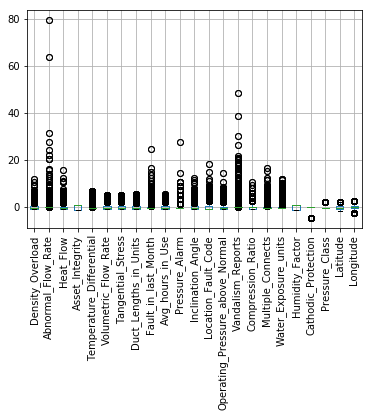

In [11]:
s = scaler(X)

pickle.dump(s, open('scaler.pkl', 'wb'))
X_scale = s.scale(X)
X_scale.boxplot(rot=90) #Preserves corr, prevents skew for linear models, good for PCA

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.1, stratify = y)

In [13]:
np.mean(y_train)
#~18% failures, stratfify sampling for better accuracy

0.1788945680815264

In [14]:
weights = np.array(y_train*4 + 1)

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train)
pickle.dump(pca,open('pca_transform.pkl','wb'))
pcvars = pca.explained_variance_ratio_
print("Sum of first n PCs:")
print([sum(pcvars[:i+1]) for i in range(len(pcvars))])
princomps = pca.components_[:10].round(decimals = 3)
#print(princomps)
#for i in princomps:
#    print(X.columns[abs(i)>0.2])
#print(X.columns[abs(pca.components_[:2].round(decimals = 3))<0.1])

Sum of first n PCs:
[0.3829969480619839, 0.5097125944669199, 0.5903033928932752, 0.6443906507349864, 0.6963983259019304, 0.744375965252788, 0.7904101550945271, 0.8318833420787194, 0.8662979035860041, 0.9005701268324559, 0.9212876468961356, 0.9378352484845444, 0.9516491082468975, 0.9628922283480977, 0.9733790049579214, 0.9832979162727653, 0.9898333829454462, 0.9948581923071688, 0.997451230884148, 0.9991079466648365, 0.9997312620256396, 0.9999971335380746, 1.0]


First 10 PCs give 90% of accuracy, small increase after. Will use only 10 PCs for subsequent modelling

In [23]:
X_pca = X_pca[:,:10]
print(X_pca.shape)

(31499, 10)


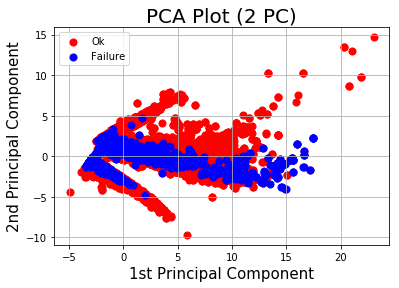

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st Principal Component', fontsize = 15)
ax.set_ylabel('2nd Principal Component', fontsize = 15)
ax.set_title('PCA Plot (2 PC)', fontsize = 20)

cols = ['r', 'b']
for f in [0,1]:
    idx = y_train == f
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], color = cols[f], s = 50)
    
ax.legend(['Ok','Failure'])
ax.grid()

In [25]:
import azureml.core
azureml.core.VERSION

import logging
import os
import random

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
from azureml.train.automl.run import AutoMLRun

ws = Workspace.from_config()

exp_name = 'c4ts-challenge4'
experiment=Experiment(ws, exp_name)
exp_list = ws.experiments

Found the config file in: C:\Users\zhpek\Desktop\C4TS-Challenge4\aml_config\config.json


In [50]:
config = AutoMLConfig(task = 'classification',
                             debug_log = 'automl_errors.log',
                             primary_metric = 'AUC_weighted',
                             iterations = 10,
                             n_cross_validations = 5,
                             verbosity = logging.INFO,
                             max_concurrent_iterations = 6,#NV6 DSVM, use 6 cores
                             sample_weight = weights,
                             X = X_pca, 
                             y = np.array(y_train))

In [56]:
if exp_name in exp_list:
    #AutoMLRun(experiment = experiment, run_id = run.id)
    run = AutoMLRun(experiment = experiment, run_id = list(experiment.get_runs())[1].id)
    run = run.continue_experiment(X = X_pca,
                              y = np.array(y_train),
                              show_output = True,
                              iterations = 5
                             )
else:
    run = experiment.submit(config) #, show_output=True
    run.upload_file('pca_transform.pkl','pca_transform.pkl')
    run.upload_file('scaler.pkl','scaler.pkl')

In [59]:
best_iter, model = run.get_output()

In [60]:
prediction = model.predict(pca.transform(X_test)[:,:10])
print('Accuracy: ' + str(np.mean(prediction == y_test)))
print('Recall: ' + str(np.mean(prediction[y_test==1] == 1)))
print('Precision: ' + str(np.mean(y_test[prediction==1] == 1)))
print('False Negatives: ' + str(np.mean(y_test[prediction==0] == 1))) #Missed this number of failures
print('False Positives: ' + str(np.mean(y_test[prediction==1] == 0))) #Checked unneccesarily

Accuracy: 0.6957142857142857
Recall: 0.8226837060702875
Precision: 0.3505786249149081
False Negatives: 0.05465288035450517
False Positives: 0.6494213750850919
